<a href="https://colab.research.google.com/github/paolaUWB/DR16Q/blob/Anna/PhysicalProperties_EmissionProperties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [77]:
import sys
import scipy.stats as stat
import numpy as np
from pylab import*
from sympy import sympify
from matplotlib.backends.backend_pdf import PdfPages
#%matplotlib inline
from scipy import*
from astropy import*
from scipy.stats import ks_2samp
from astropy import constants as const
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy import stats
import os
from os.path import exists
import csv
import pandas as pd
import re

In [3]:
#Rankine Inputs
infoDR16 = "/content/drive/MyDrive/Quasar/DR16Q/DR16Q_v4.fits" #DR16 fits file

#XQR-30 Properties File
xqrdata = pd.read_csv('https://raw.githubusercontent.com/paolaUWB/DR16Q/Anna/CROSS_CORRELATION/XQR30_Property_Data.csv')

#Rankines info file PRH selected the good cases
infoRankineparent = 'https://raw.githubusercontent.com/paolaUWB/DR16Q/master/CROSS_CORRELATION/DR16parent_DR14RankineInfo.csv'
infoRankineEHVO = "https://raw.githubusercontent.com/paolaUWB/DR16Q/master/CROSS_CORRELATION/DR16EHVO_DR14RankineInfo.csv"
infoRankineparent_DR9 = "https://raw.githubusercontent.com/paolaUWB/DR16Q/Liliana/CROSS_CORRELATION/DR9parent_DR14RankineInfo.csv"
infoRankineEHVO_DR9 = "https://raw.githubusercontent.com/paolaUWB/DR16Q/Liliana/CROSS_CORRELATION/DR9EHVO_DR14RankineInfo_withEHVOspeeds.csv"
RH_parent_16= 'https://raw.githubusercontent.com/paolaUWB/DR16Q/masterCROSS_CORRELATION/DR16_parent_sample.csv'

#Extracting values from Rankines info file for EHVO Parent
dfRPA = pd.read_csv(infoRankineparent, header=None)
dfRHV = pd.read_csv(infoRankineEHVO, header=None)
dfRPA_9 = pd.read_csv(infoRankineparent_DR9, header=None)
dfRHV_9 = pd.read_csv(infoRankineEHVO_DR9, header=None)

#Extracting Values from XQR-30 Properties Files
xqr_loglbol = np.array(xqrdata["Log_Lbol"])
xqr_logmbh = np.array(xqrdata["Log_bhm_civ"])
xqr_edd = np.array(xqrdata["edd_civ"])
xqr_logedd = np.log10(xqr_edd)
xqr_EHVOstatus = np.array(xqrdata["status"])
xqr_bs = np.array(xqrdata["CIV_Emission_Blueshift"])

#XQR30: Separating Quasars by type using the midZstatus column of the csv
xqr_EHVO = (xqr_EHVOstatus == "EHVO")
xqr_nonBAL = (xqr_EHVOstatus == "nBAL")
xqr_BAL = (xqr_EHVOstatus == 'BAL')
xqr_unknown = (xqr_EHVOstatus == "N/A")


#EHVO Physical Properties-----------------------------------------------------------
xqr_lbol_EHVO = xqr_loglbol[xqr_EHVO]
xqr_mbh_EHVO = xqr_logmbh[xqr_EHVO]
xqr_edd_EHVO = xqr_logedd[xqr_EHVO]
xqr_bs_EHVO = xqr_bs[xqr_EHVO]



#Parent Physical Properties-----------------------------------------------------------

##Not Ideal that they're separate to begin with, just working with the CSV setup at this point. Maybe come back to fix this at another time
nonBALlbol = xqr_loglbol[xqr_nonBAL]
nonBALmbh = xqr_logmbh[xqr_nonBAL]
nonBALedd = xqr_logedd[xqr_nonBAL]
xqr_bs_nonBAL = xqr_bs[xqr_nonBAL]
BALlbol = xqr_loglbol[xqr_BAL]
BALmbh = xqr_logmbh[xqr_BAL]
BALedd = xqr_logedd[xqr_BAL]
xqr_bs_BAL = xqr_bs[xqr_BAL]


xqr_lbol_Parent = np.concatenate([nonBALlbol, BALlbol])
xqr_mbh_Parent = np.concatenate([nonBALmbh, BALmbh])
xqr_edd_Parent = np.concatenate([nonBALedd, BALedd])
xqr_bs_Parent = np.concatenate([xqr_bs_nonBAL, xqr_bs_BAL])

xqr_bs_both = np.concatenate([xqr_bs_Parent, xqr_bs_EHVO])

###DR16###
#for parent sample
Parentin16Rank_mbh=dfRPA[dfRPA.columns[16]].to_numpy()
Parentin16Rank_lbol=dfRPA[dfRPA.columns[17]].to_numpy()
Parentin16Rank_redd=dfRPA[dfRPA.columns[18]].to_numpy()
Parentin16Rank_CivBlue=dfRPA[dfRPA.columns[5]].to_numpy()
Parentin16Rank_CivEW=dfRPA[dfRPA.columns[6]].to_numpy()


  #for EHVOs
EHVOin16Rank_mbh=dfRHV[dfRHV.columns[16]].to_numpy()
EHVOin16Rank_lbol=dfRHV[dfRHV.columns[17]].to_numpy()
EHVOin16Rank_redd=dfRHV[dfRHV.columns[18]].to_numpy()
EHVOin16Rank_CivBlue=dfRHV[dfRHV.columns[5]].to_numpy()
EHVOin16Rank_CivEW=dfRHV[dfRHV.columns[6]].to_numpy()

###DR9###

#for parent sample
Parentin9Rank_mbh=dfRPA_9[dfRPA_9.columns[16]].to_numpy()
Parentin9Rank_lbol=dfRPA_9[dfRPA_9.columns[17]].to_numpy()
Parentin9Rank_redd=dfRPA_9[dfRPA_9.columns[18]].to_numpy()
Parentin9Rank_CivBlue=dfRPA_9[dfRPA_9.columns[5]].to_numpy()
Parentin9Rank_CivEW=dfRPA_9[dfRPA_9.columns[6]].to_numpy()

#for EHVOs
EHVOin9Rank_mbh=dfRHV_9[dfRHV_9.columns[16]].to_numpy()
EHVOin9Rank_lbol=dfRHV_9[dfRHV_9.columns[17]].to_numpy()
EHVOin9Rank_redd=dfRHV_9[dfRHV_9.columns[18]].to_numpy()
EHVOin9Rank_CivBlue=dfRHV_9[dfRHV_9.columns[5]].to_numpy()
EHVOin9Rank_CivEW=dfRHV_9[dfRHV_9.columns[6]].to_numpy()


###Combined DR9 and DR16 Arrays###

#Parent Sample
parentboth_mbh = np.concatenate([Parentin9Rank_mbh, Parentin16Rank_mbh])
parentboth_lbol = np.concatenate([Parentin9Rank_lbol, Parentin16Rank_lbol])
parentboth_redd = np.concatenate([Parentin9Rank_redd, Parentin16Rank_redd])
parentboth_CivBlue = np.concatenate([Parentin9Rank_CivBlue, Parentin16Rank_CivBlue])
parentboth_CivEW = np.concatenate([Parentin9Rank_CivEW, Parentin16Rank_CivEW])


#EHVOs
EHVOboth_mbh = np.concatenate([EHVOin9Rank_mbh, EHVOin16Rank_mbh])
EHVOboth_lbol = np.concatenate([EHVOin9Rank_lbol, EHVOin16Rank_lbol])
EHVOboth_redd = np.concatenate([EHVOin9Rank_redd, EHVOin16Rank_redd])
EHVOboth_CivBlue = np.concatenate([EHVOin9Rank_CivBlue, EHVOin16Rank_CivBlue])
EHVOboth_CivEW = np.concatenate([EHVOin9Rank_CivEW, EHVOin16Rank_CivEW])

#'Good' Values for Parent Sample
bb9 = np.where(Parentin9Rank_CivBlue > 500)
#bb9_EHVO = np.where(EHVOin9Rank_CivBlue > 500) #might be unneccessary
bb16 = np.where(Parentin16Rank_CivBlue > 500)
#bb16_EHVO = np.where(EHVOin16Rank_CivBlue > 500) #might be unneccessary
bb_both = np.where(parentboth_CivBlue > 500)
#bbboth_EHVO = np.where(EHVOboth_CivBlue > 500) #might be unneccessary

#Combined EHVO and Parent Blueshift Arrays for Color Map
c_DR16_CivBlue = np.concatenate([Parentin16Rank_CivBlue[bb16], EHVOin16Rank_CivBlue])
c_DR9_CivBlue = np.concatenate([Parentin9Rank_CivBlue[bb9], EHVOin9Rank_CivBlue])
c_both_CivBlue = np.concatenate([parentboth_CivBlue[bb_both], EHVOboth_CivBlue])

#COMBINED EHVO and Parent Equivalent Width Arrays for Color Map
c_DR16_CivEW = np.concatenate([Parentin16Rank_CivEW[bb16], EHVOin16Rank_CivEW])
c_DR9_CivEW = np.concatenate([Parentin9Rank_CivEW[bb9], EHVOin9Rank_CivEW])
c_both_CivEW = np.concatenate([parentboth_CivEW[bb_both], EHVOboth_CivEW])

#Color Map
cm = plt.get_cmap('viridis')
cmap = plt.get_cmap('viridis')


#Reading 16 fits table files
hdu_16 = fits.open(infoDR16)
data_16 = hdu_16[1].data
#print(data_16.columns)
SDSS_name_16 = data_16['SDSS_NAME']
plate_16 = data_16['PLATE  ']
mjd_16 = data_16['MJD']
fiber_16 = data_16['FIBERID ']
SNR_16 = data_16['SN_MEDIAN_ALL']
redshift_16 = data_16['z']
fits_16__duplicate_PLATE = data_16['PLATE_DUPLICATE']
fits_16__duplicate_MJD = data_16['MJD_DUPLICATE']
fits_16__duplicate_FIBER = data_16['FIBERID_DUPLICATE']
hdu_16.close()


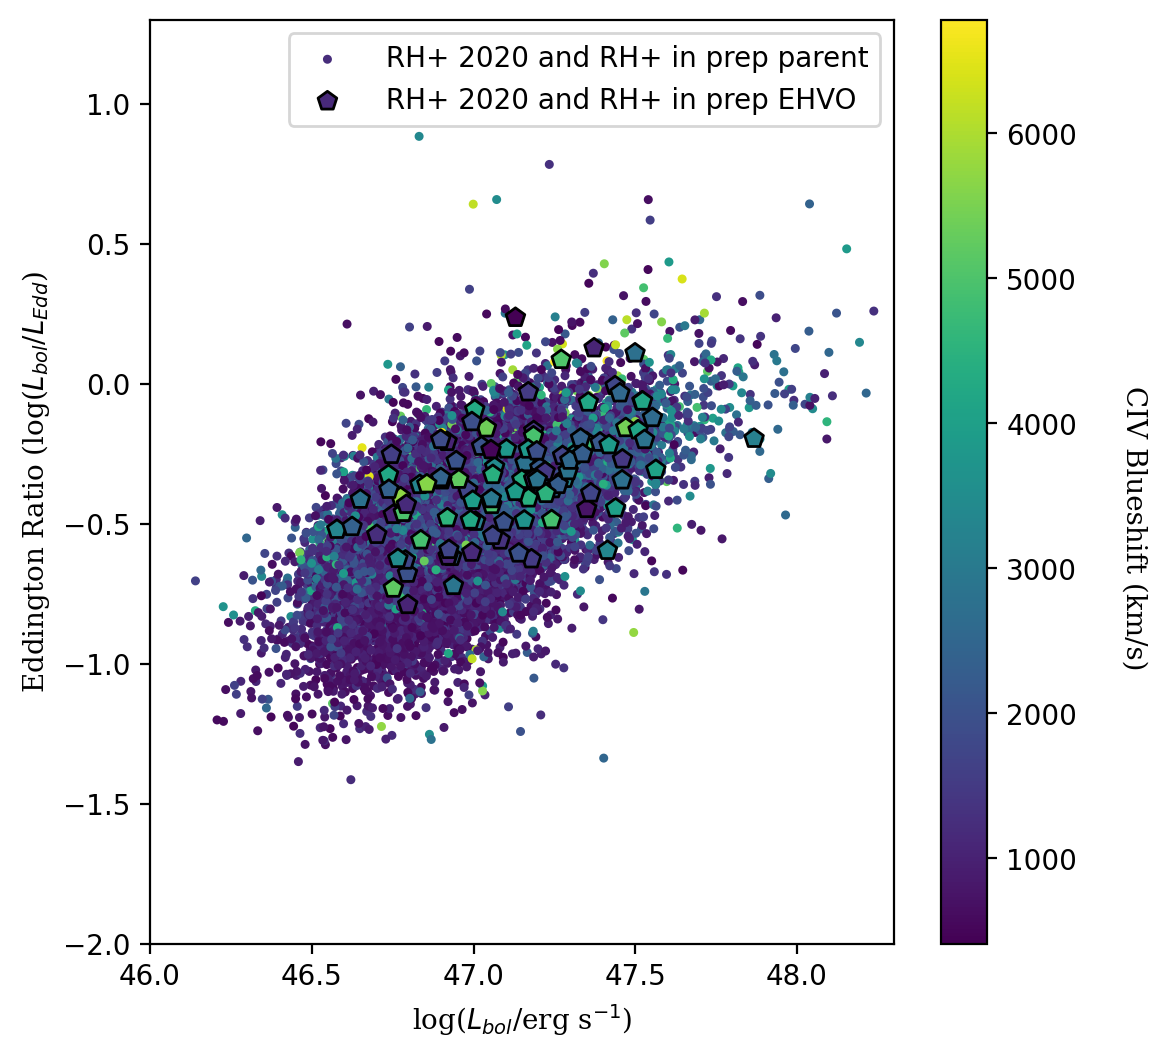

In [4]:
# Lbol vs Eddington ratio cm = CIV blueshift
plotDR16 = 'yes'
plotDR9 = 'yes'


figure(figsize=(6, 6), dpi=200)

#JUST DR9
if plotDR9 == 'yes' and plotDR16 == 'no':
    #DR9 Parent
    sc = plt.scatter(Parentin9Rank_lbol[bb9] , Parentin9Rank_redd[bb9], c = Parentin9Rank_CivBlue[bb9], vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), s=5, cmap=cm, label = 'RH+ 2020 parent')
    #DR9 EHVO
    sc = plt.scatter(EHVOin9Rank_lbol, EHVOin9Rank_redd, c = EHVOin9Rank_CivBlue, vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), s=50, marker=(5, 0), edgecolor = 'black', label = 'RH+ 2020 EHVO')


#JUST DR16
if plotDR16 == 'yes' and plotDR9 == 'no':
    #DR16 Parent
    sc = plt.scatter(Parentin16Rank_lbol[bb16] , Parentin16Rank_redd[bb16], c = Parentin16Rank_CivBlue[bb16], vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), s=5, cmap=cm, label = 'RH+ in prep parent')
    #DR16 EHVO
    sc = plt.scatter(EHVOin16Rank_lbol, EHVOin16Rank_redd, c = EHVOin16Rank_CivBlue, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), s=50, marker=(5, 0), edgecolor = 'black', label = 'RH+ in prep EHVO')

#DR9 AND DR16
if plotDR16 == 'yes' and plotDR9 == 'yes':
    #DR16 Parent
    sc = plt.scatter(parentboth_lbol[bb_both] , parentboth_redd[bb_both], c = parentboth_CivBlue[bb_both], vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), s=5, cmap=cm, label = ' RH+ 2020 and RH+ in prep parent')
    #DR16 EHVO
    sc = plt.scatter(EHVOboth_lbol, EHVOboth_redd, c = EHVOboth_CivBlue, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), s=50, marker=(5, 0), edgecolor = 'black', label = ' RH+ 2020 and RH+ in prep EHVO')


plt.axis((46.0,48.3,-2,1.3))
plt.xlabel('log($L_{bol}$/erg s$^{-1}$)', fontname='serif')
plt.ylabel('Eddington Ratio (log($L_{bol}$/$L_{Edd}$)',fontname='serif')
plt.text(49,-1,'CIV Blueshift (km/s)', rotation = -90, fontname='serif')
plt.legend(loc='upper right')
plt.colorbar(sc)
plt.show()

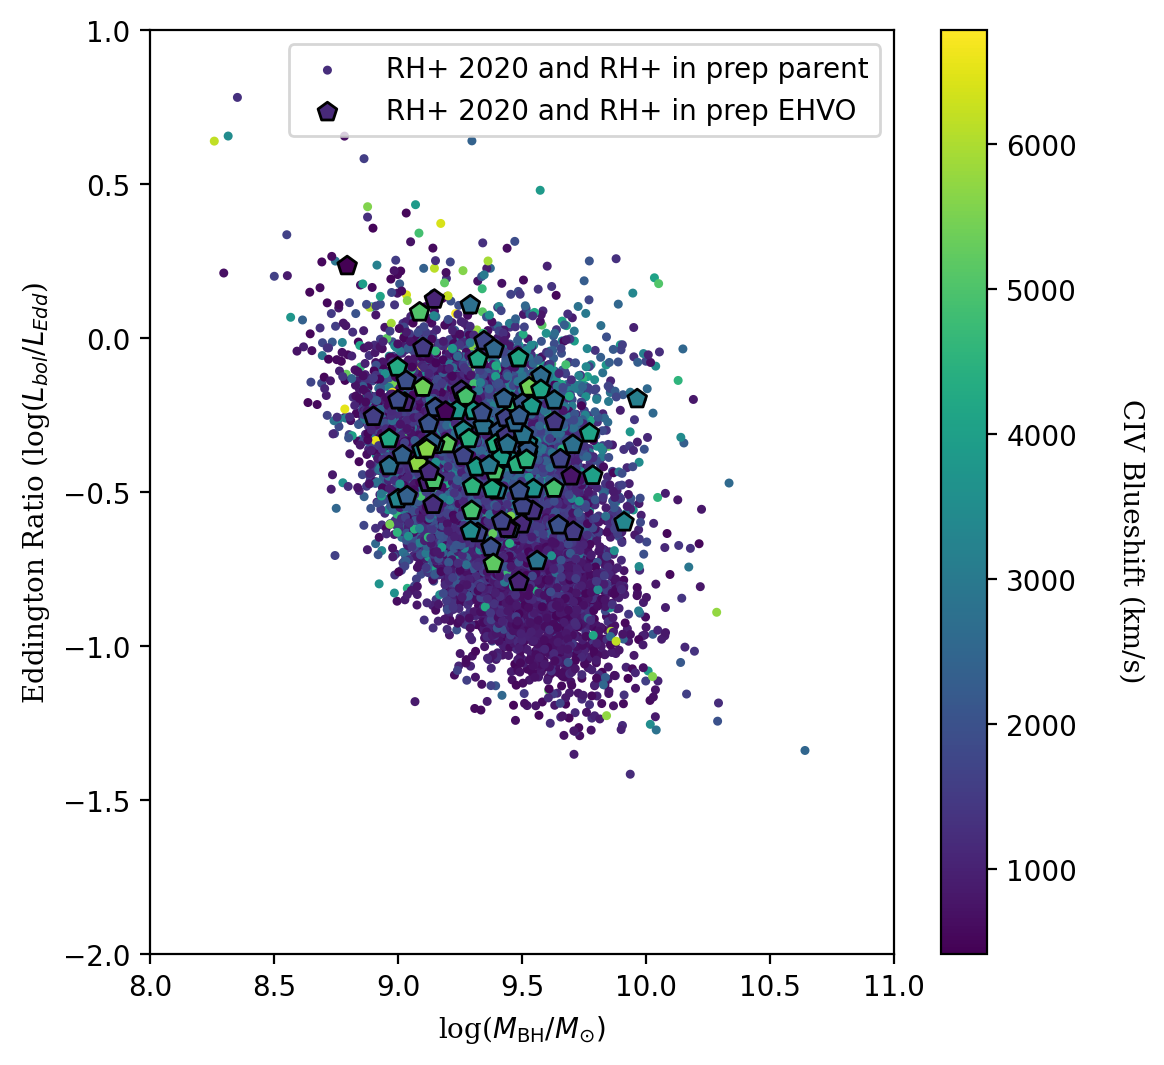

In [5]:
# MBH vs Eddington Ratio cm = CIV blueshift

plotDR16 = 'yes'
plotDR9 = 'yes'

figure(figsize=(6, 6), dpi=200)

#JUST DR9
if plotDR9 == 'yes' and plotDR16 == 'no':
    #DR9 Parent
    sc = plt.scatter(Parentin9Rank_mbh[bb9] , Parentin9Rank_redd[bb9], c = Parentin9Rank_CivBlue[bb9], vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), s=5,label = 'RH+2020 parent')
    #DR9 EHVO
    sc = plt.scatter(EHVOin9Rank_mbh , EHVOin9Rank_redd, c = EHVOin9Rank_CivBlue, vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), s=50, cmap=cm, marker=(5, 0), edgecolor = 'black', label = 'RH+2020 EHVO')

#JUST DR16
if plotDR16 == 'yes' and plotDR9 == 'no':
    #DR16 Parent
    sc = plt.scatter(Parentin16Rank_mbh[bb16] , Parentin16Rank_redd[bb16], c = Parentin16Rank_CivBlue[bb16], vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), s=5, cmap=cm, label = 'RH+ in prep parent')
    #DR16 EHVO
    sc = plt.scatter(EHVOin16Rank_mbh , EHVOin16Rank_redd, c = EHVOin16Rank_CivBlue, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), s=50, cmap=cm, marker=(5, 0), edgecolor = 'black', label = 'RH+ in prep EHVO')

#DR9 AND DR16
if plotDR16 == 'yes' and plotDR9 == 'yes':
    #DR9 and DR16 Parent
    sc = plt.scatter(parentboth_mbh[bb_both] , parentboth_redd[bb_both], c = parentboth_CivBlue[bb_both], vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), s=5, cmap=cm, label = ' RH+ 2020 and RH+ in prep parent')
    #DR9 and DR16 EHVO
    sc = plt.scatter(EHVOboth_mbh, EHVOboth_redd, c = EHVOboth_CivBlue, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), s=50, marker=(5, 0), edgecolor = 'black', label = ' RH+ 2020 and RH+ in prep EHVO')

plt.axis((8,11,-2,1))
plt.xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
plt.ylabel('Eddington Ratio (log($L_{bol}$/$L_{Edd}$)',fontname='serif')
plt.text(11.9,-1.1,'CIV Blueshift (km/s)', rotation = -90, fontname='serif')
plt.legend(loc='upper right')
plt.colorbar(sc)
plt.show()

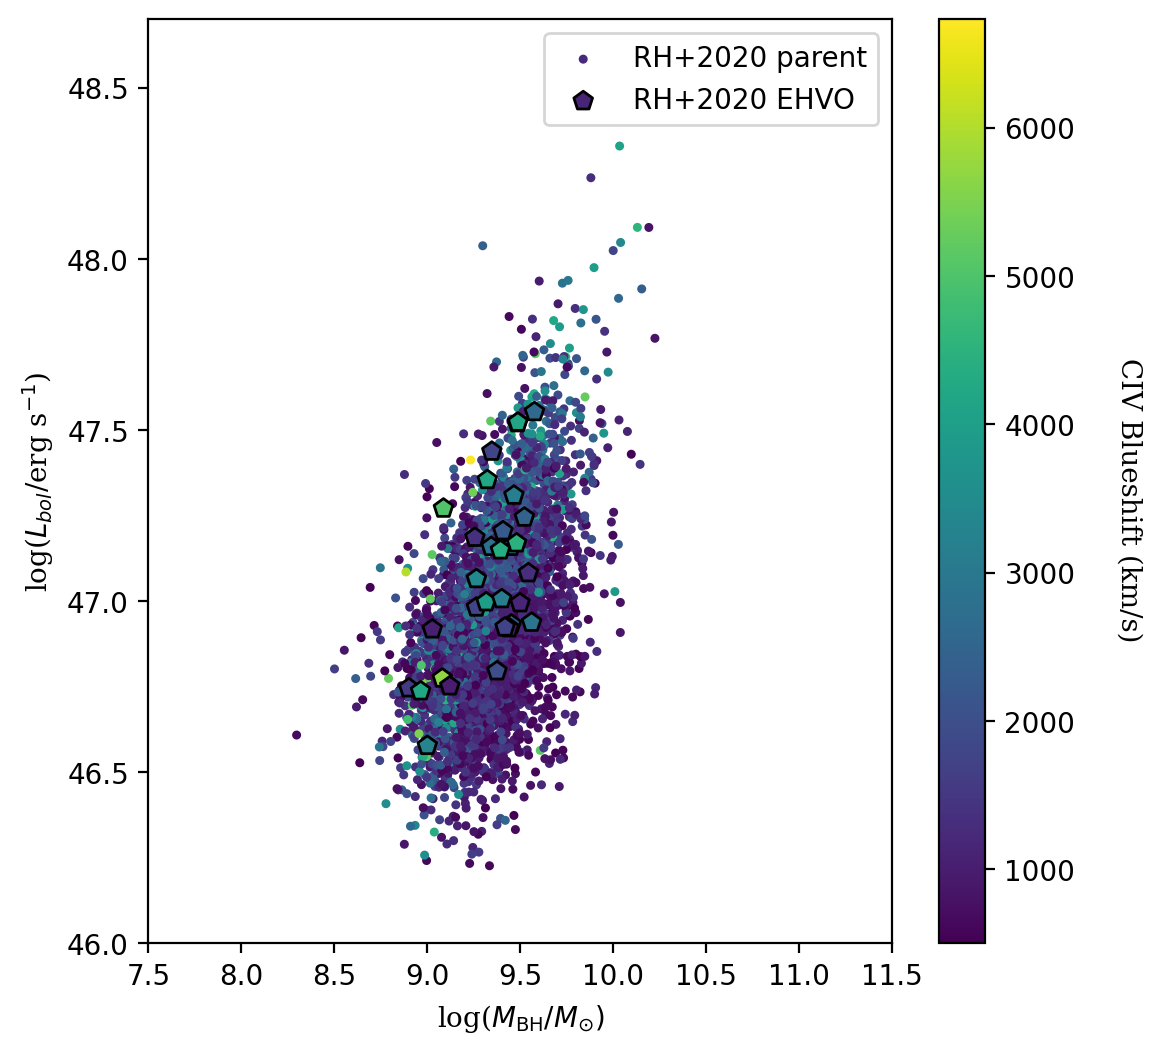

In [6]:
# Lbol vs MBH cm = CIV blueshift

plotDR16 = 'no'
plotDR9 = 'yes'


figure(figsize=(6, 6), dpi=200)

#JUST DR9
if plotDR9 == 'yes' and plotDR16 == 'no':
  #DR9 Parent
    sc = plt.scatter(Parentin9Rank_mbh[bb9], Parentin9Rank_lbol[bb9] , c = Parentin9Rank_CivBlue[bb9], vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), s=5, cmap=cm, label = 'RH+2020 parent')
  #DR9 EHVO
    sc = plt.scatter(EHVOin9Rank_mbh, EHVOin9Rank_lbol, c = EHVOin9Rank_CivBlue, vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), s=50, cmap=cm, marker=(5, 0), edgecolor = 'black', label = 'RH+2020 EHVO')

#JUST DR16
if plotDR16 == 'yes' and plotDR9 == 'no':
    #DR16 Parent
    sc = plt.scatter(Parentin16Rank_mbh[bb16], Parentin16Rank_lbol[bb16] , c = Parentin16Rank_CivBlue[bb16], vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), s=5, cmap=cm, label = 'RH+ in prep parent')
    #DR16 EHVO
    sc = plt.scatter( EHVOin16Rank_mbh, EHVOin16Rank_lbol , c = EHVOin16Rank_CivBlue, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), s=50, cmap=cm, marker=(5, 0), edgecolor = 'black', label = 'RH+ in prep EHVO')

#DR9 AND DR16
if plotDR16 == 'yes' and plotDR9 == 'yes':
    #DR16 and DR9 Parent
    sc = plt.scatter(parentboth_mbh[bb_both], parentboth_lbol[bb_both] , c = parentboth_CivBlue[bb_both], vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), s=5, cmap=cm, label = ' RH+ 2020 and RH+ in prep parent')
    #DR16 and DR9 EHVO
    sc = plt.scatter(EHVOboth_mbh, EHVOboth_lbol, c = EHVOboth_CivBlue, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), s=50, marker=(5, 0), edgecolor = 'black', label = ' RH+ 2020 and RH+ in prep EHVO')


plt.axis((7.5,11.5,46.0,48.7))
plt.xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
plt.ylabel('log($L_{bol}$/erg s$^{-1}$)',fontname='serif')
plt.text(12.7,46.9,'CIV Blueshift (km/s)', rotation = -90, fontname='serif')
plt.legend(loc='upper right')
plt.colorbar(sc)
plt.show()

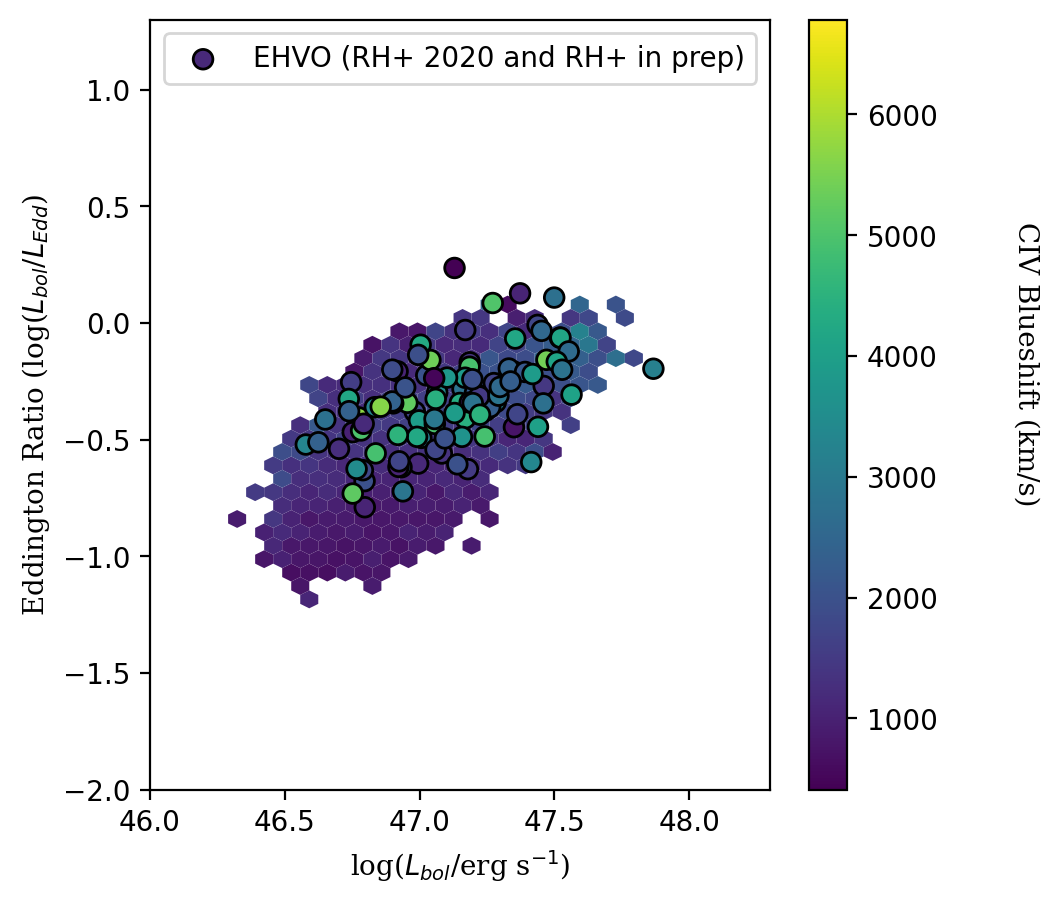

In [7]:
##Hexagon Plots - EDDINGTON RATIO VS LBOL C IV BS
plotDR9 = 'yes'
plotDR16 = 'yes'
colorop = 'one'

figure(figsize=(5, 5), dpi=200)
#plt.axis((-700,6200,0.8,2.0))

#JUST DR9

if plotDR9 == 'yes' and plotDR16 == 'no':
  cm = plt.hexbin(Parentin9Rank_lbol[bb9], Parentin9Rank_redd[bb9],  C = Parentin9Rank_CivBlue[bb9], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOin9Rank_lbol, EHVOin9Rank_redd, c = EHVOin9Rank_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), label = 'RH+ 2020 EHVO')

#JUST DR16

if plotDR9 == 'no' and plotDR16 == 'yes':
  cm = plt.hexbin(Parentin16Rank_lbol[bb16], Parentin16Rank_redd[bb16],  C = Parentin16Rank_CivBlue[bb16], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOin16Rank_lbol, EHVOin16Rank_redd, c = EHVOin16Rank_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), label = 'RH+ in prep EHVO')


#DR9 AND DR16
if plotDR16 == 'yes' and plotDR9 == 'yes' and colorop == 'one':
  cm = plt.hexbin(parentboth_lbol[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOboth_lbol, EHVOboth_redd, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_both_CivBlue), vmax = max(c_both_CivBlue), label = 'EHVO (RH+ 2020 and RH+ in prep)')


if plotDR16 == 'yes' and plotDR9 == 'yes' and colorop == 'two':
  cm = plt.hexbin(parentboth_lbol[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin = None ,vmax = None, edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  #sc = plt.scatter(EHVOboth_lbol, EHVOboth_redd, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin = cbar.vmin, vmax = cbar.vmax, label = 'EHVO (RH+ 2020 and RH+ in prep)')

plt.axis((46.0,48.3,-2,1.3))
plt.xlabel('log($L_{bol}$/erg s$^{-1}$)', fontname='serif')
plt.ylabel('Eddington Ratio (log($L_{bol}$/$L_{Edd}$)',fontname='serif')
plt.text(49.2,-0.76,'CIV Blueshift (km/s)', rotation = -90, fontname='serif')
plt.legend(loc='upper right')
plt.show()




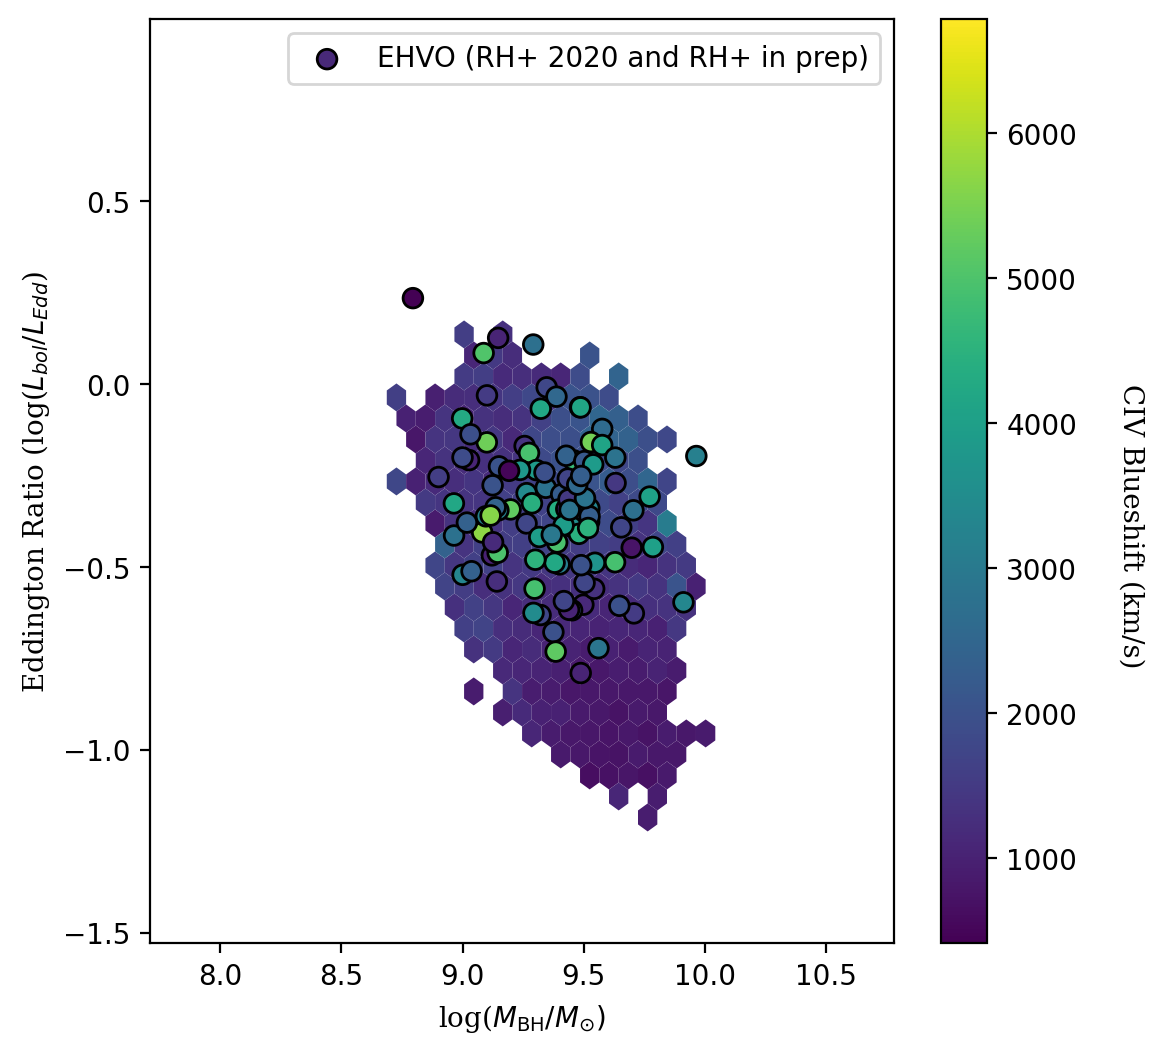

In [8]:
##Hexagon Plots - EDDINGTON RATIO VS MBH C IV BS
plotDR9 = 'yes'
plotDR16 = 'yes'
colorop = 'one'

figure(figsize=(6, 6), dpi=200)
#plt.axis((-700,6200,0.8,2.0))

#JUST DR9

if plotDR9 == 'yes' and plotDR16 == 'no':
  cm = plt.hexbin(Parentin9Rank_mbh[bb9], Parentin9Rank_redd[bb9],  C = Parentin9Rank_CivBlue[bb9], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOin9Rank_mbh, EHVOin9Rank_redd, c = EHVOin9Rank_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), label = 'RH+ 2020 EHVO')

#JUST DR16

if plotDR9 == 'no' and plotDR16 == 'yes':
  cm = plt.hexbin(Parentin16Rank_mbh[bb16], Parentin16Rank_redd[bb16],  C = Parentin16Rank_CivBlue[bb16], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOin16Rank_mbh, EHVOin16Rank_redd, c = EHVOin16Rank_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), label = 'RH+ in prep EHVO')


#DR9 AND DR16

if plotDR16 == 'yes' and plotDR9 == 'yes' and colorop == 'one':
  cm = plt.hexbin(parentboth_mbh[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOboth_mbh, EHVOboth_redd, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), label = 'EHVO (RH+ 2020 and RH+ in prep)')

if plotDR16 == 'yes' and plotDR9 == 'yes' and colorop == 'two':
  cm = plt.hexbin(parentboth_mbh[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=None, vmax=None, edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOboth_mbh, EHVOboth_redd, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=cbar.vmin, vmax=cbar.vmax, label = 'EHVO (RH+ 2020 and RH+ in prep)')

plt.xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
plt.ylabel('Eddington Ratio (log($L_{bol}$/$L_{Edd}$)',fontname='serif')
plt.text(11.7,-0.76,'CIV Blueshift (km/s)', rotation = -90, fontname='serif')
plt.legend(loc='upper right')
plt.show()




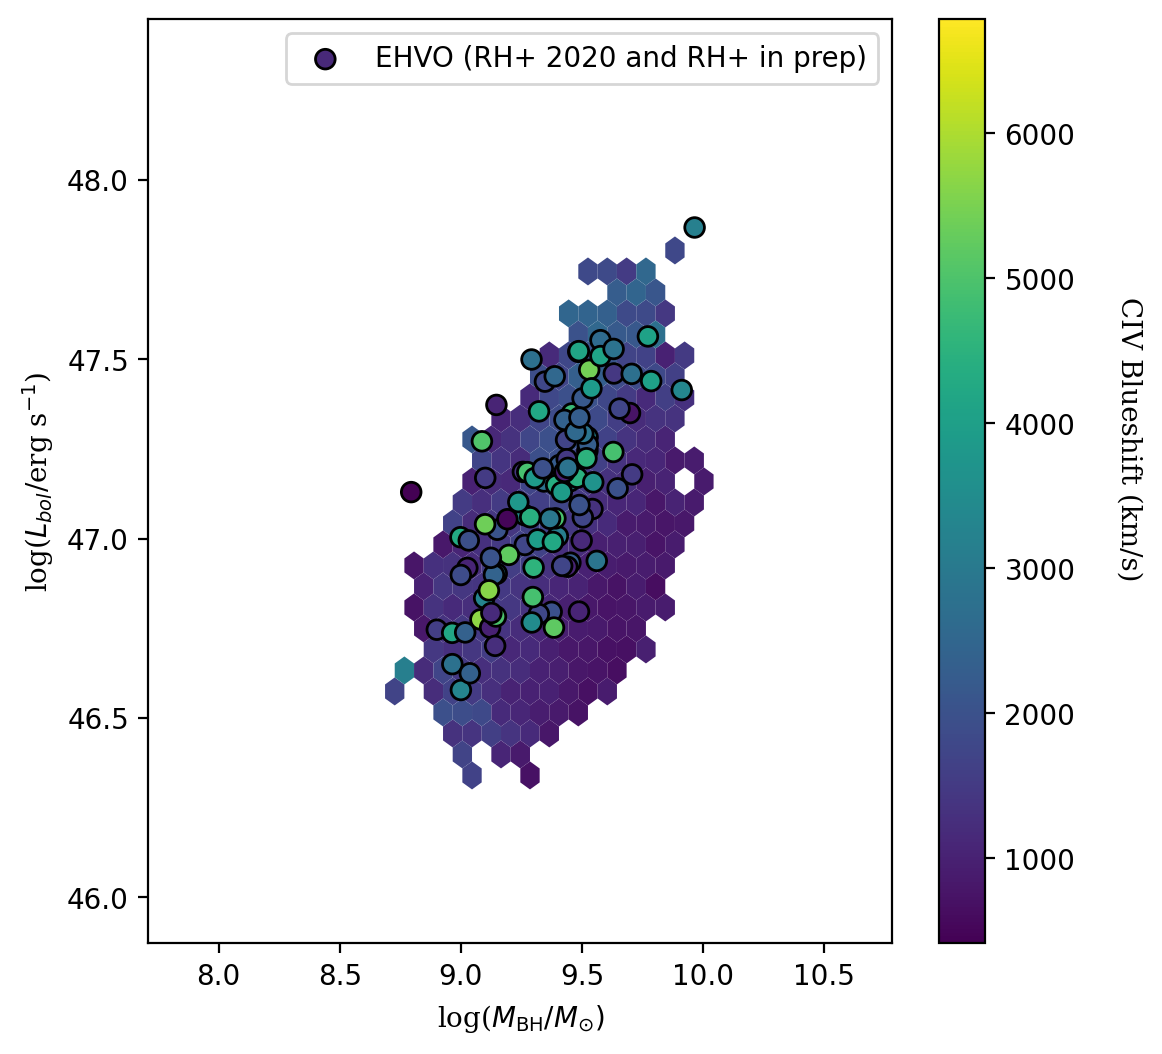

In [9]:
#Hexagon Plots -  LBOL VS MBH C IV BS
plotDR9 = 'yes'
plotDR16 = 'yes'
colorop = 'one'

figure(figsize=(6, 6), dpi=200)
#plt.axis((-700,6200,0.8,2.0))

#JUST DR9

if plotDR9 == 'yes' and plotDR16 == 'no':
  cm = plt.hexbin(Parentin9Rank_mbh[bb9], Parentin9Rank_lbol[bb9],  C = Parentin9Rank_CivBlue[bb9], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOin9Rank_mbh, EHVOin9Rank_lbol, c = EHVOin9Rank_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_DR9_CivBlue), vmax=max(c_DR9_CivBlue), label = 'RH+ 2020 EHVO')

#JUST DR16

if plotDR9 == 'no' and plotDR16 == 'yes':
  cm = plt.hexbin(Parentin16Rank_mbh[bb16], Parentin16Rank_lbol[bb16],  C = Parentin16Rank_CivBlue[bb16], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOin16Rank_mbh, EHVOin16Rank_lbol, c = EHVOin16Rank_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), label = 'RH+ in prep EHVO')


#DR9 AND DR16

if plotDR16 == 'yes' and plotDR9 == 'yes' and colorop == 'one':
  cm = plt.hexbin(parentboth_mbh[bb_both], parentboth_lbol[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOboth_mbh, EHVOboth_lbol, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), label = 'EHVO (RH+ 2020 and RH+ in prep)')

if plotDR16 == 'yes' and plotDR9 == 'yes' and colorop == 'two':
  cm = plt.hexbin(parentboth_mbh[bb_both], parentboth_lbol[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=None, vmax=None, edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOboth_mbh, EHVOboth_lbol, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=cbar.vmin, vmax=cbar.vmax, label = 'EHVO (RH+ 2020 and RH+ in prep)')


plt.xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
plt.ylabel('log($L_{bol}$/erg s$^{-1}$)',fontname='serif')
plt.text(11.7,46.9,'CIV Blueshift (km/s)', rotation = -90, fontname='serif')
plt.legend(loc='upper right')
plt.show()

#avoids high MBH and low Lbol


<ipython-input-20-37e0cac379e5>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


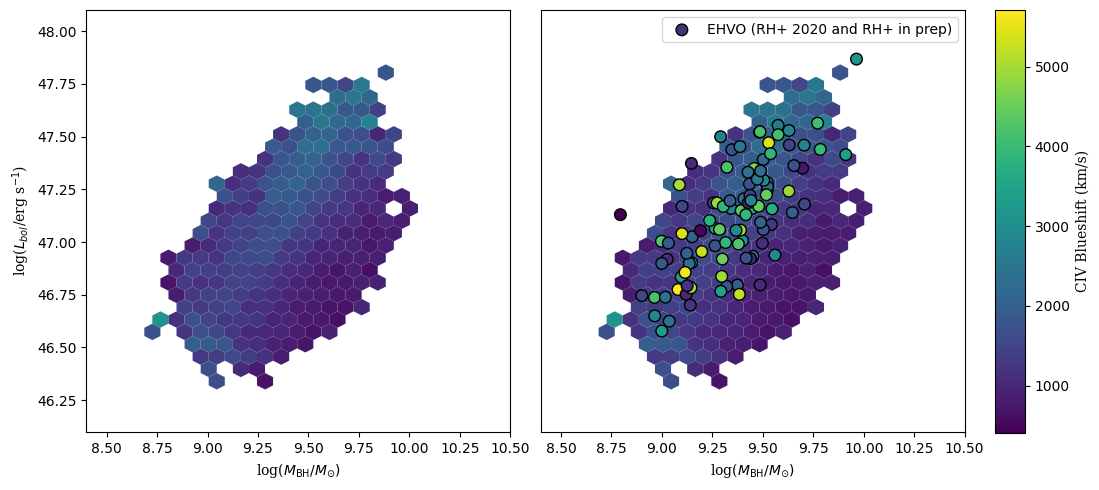

<ipython-input-20-37e0cac379e5>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


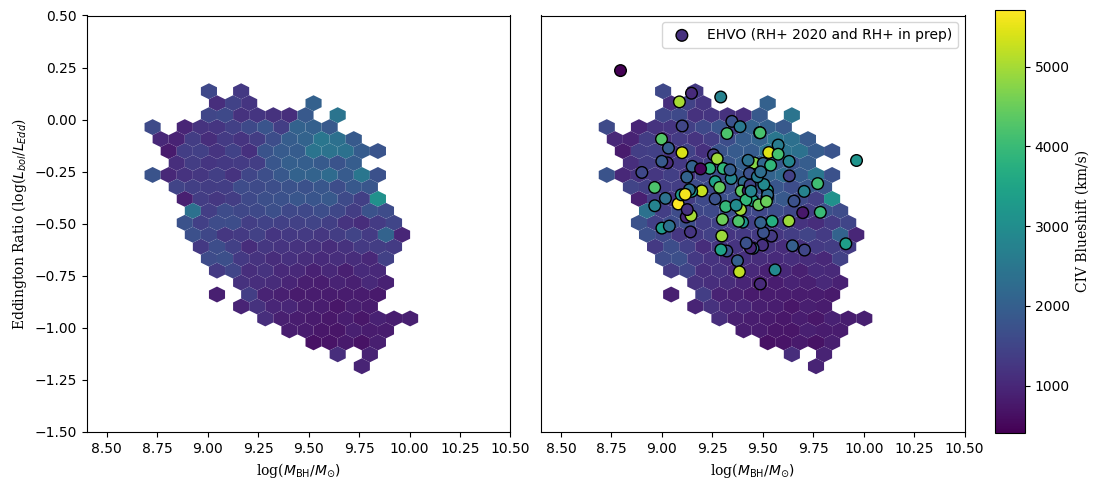

<ipython-input-20-37e0cac379e5>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


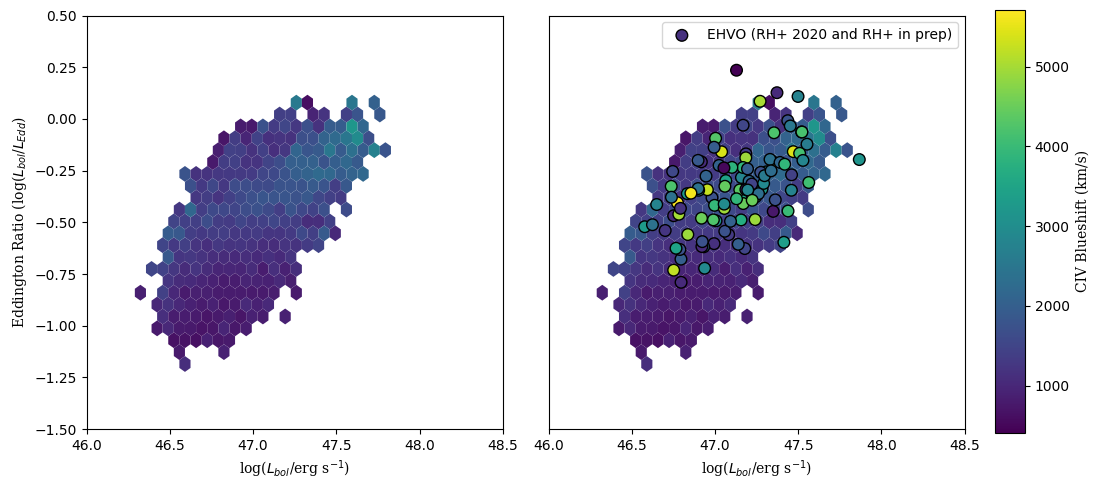

In [20]:
#Corner Plots attempt

##LBOL vs MBH, C IV emission line Blueshift########################################################


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

#Parent Sample only, DR9 and DR16 combined

cm = ax1.hexbin(parentboth_mbh[bb_both], parentboth_lbol[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
ax1.set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
ax1.set_ylabel('log($L_{bol}$/erg s$^{-1}$)',fontname='serif')
ax1.set_xlim(8.4,10.5)
ax1.set_ylim(46.1,48.1)

#Creating the colorbar and settings it label and location
cbarax = fig.add_axes([1, 0.125, 0.03, 0.845])
cbar = plt.colorbar(cm, cax=cbarax)
cbarax.set_ylabel('CIV Blueshift (km/s)', rotation = 90, fontname='serif')

#Parent Sample and EHVO sample, DR9 and DR16 combined

cm = ax2.hexbin(parentboth_mbh[bb_both], parentboth_lbol[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
sc = ax2.scatter(EHVOboth_mbh, EHVOboth_lbol, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 70, vmin=cbar.vmin, vmax=cbar.vmax, label = 'EHVO (RH+ 2020 and RH+ in prep)')
ax2.set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
#Removing yticks for second plot
ax2.set_yticks([])
ax2.set_xlim(8.4,10.5)
ax2.set_ylim(46.1,48.1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

##EDD RATIO VS MBH, C IV emission line Blueshift####################################################


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

#Parent Sample only, DR9 and DR16 combined

cm = ax1.hexbin(parentboth_mbh[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
ax1.set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
ax1.set_ylabel('Eddington Ratio (log($L_{bol}$/$L_{Edd}$)',fontname='serif')
ax1.set_xlim(8.4,10.5)
ax1.set_ylim(-1.5,0.5)

#Creating the colorbar and settings it label and location
cbarax = fig.add_axes([1, 0.125, 0.03, 0.845])
cbar = plt.colorbar(cm, cax=cbarax)
cbarax.set_ylabel('CIV Blueshift (km/s)', rotation = 90, fontname='serif')

#Parent Sample and EHVO sample, DR9 and DR16 combined
cm = ax2.hexbin(parentboth_mbh[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
sc = ax2.scatter(EHVOboth_mbh, EHVOboth_redd, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 70, vmin=cbar.vmin, vmax=cbar.vmax, label = 'EHVO (RH+ 2020 and RH+ in prep)')
ax2.set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
#Removing yticks for second plot
ax2.set_yticks([])
ax2.set_xlim(8.4,10.5)
ax2.set_ylim(-1.5,0.5)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

##EDD RATIO VS LBOL, C IV emission line Blueshift####################################################


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

#Parent Sample only, DR9 and DR16 combined

cm = ax1.hexbin(parentboth_lbol[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
ax1.set_xlabel('log($L_{bol}$/erg s$^{-1}$)', fontname='serif')
ax1.set_ylabel('Eddington Ratio (log($L_{bol}$/$L_{Edd}$)',fontname='serif')
ax1.set_xlim(46,48.5)
ax1.set_ylim(-1.5,0.5)

#Creating the colorbar and settings it label and location
cbarax = fig.add_axes([1, 0.125, 0.03, 0.845])
cbar = plt.colorbar(cm, cax=cbarax)
cbarax.set_ylabel('CIV Blueshift (km/s)', rotation = 90, fontname='serif')

#Parent Sample and EHVO sample, DR9 and DR16 combined
cm = ax2.hexbin(parentboth_lbol[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
sc = ax2.scatter(EHVOboth_lbol, EHVOboth_redd, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 70, vmin=cbar.vmin, vmax=cbar.vmax, label = 'EHVO (RH+ 2020 and RH+ in prep)')
ax2.set_xlabel('log($L_{bol}$/erg s$^{-1}$)', fontname='serif')
#Removing yticks for second plot
ax2.set_yticks([])
ax2.set_xlim(46,48.5)
ax2.set_ylim(-1.5,0.5)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()







<ipython-input-25-e5da72d47026>:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


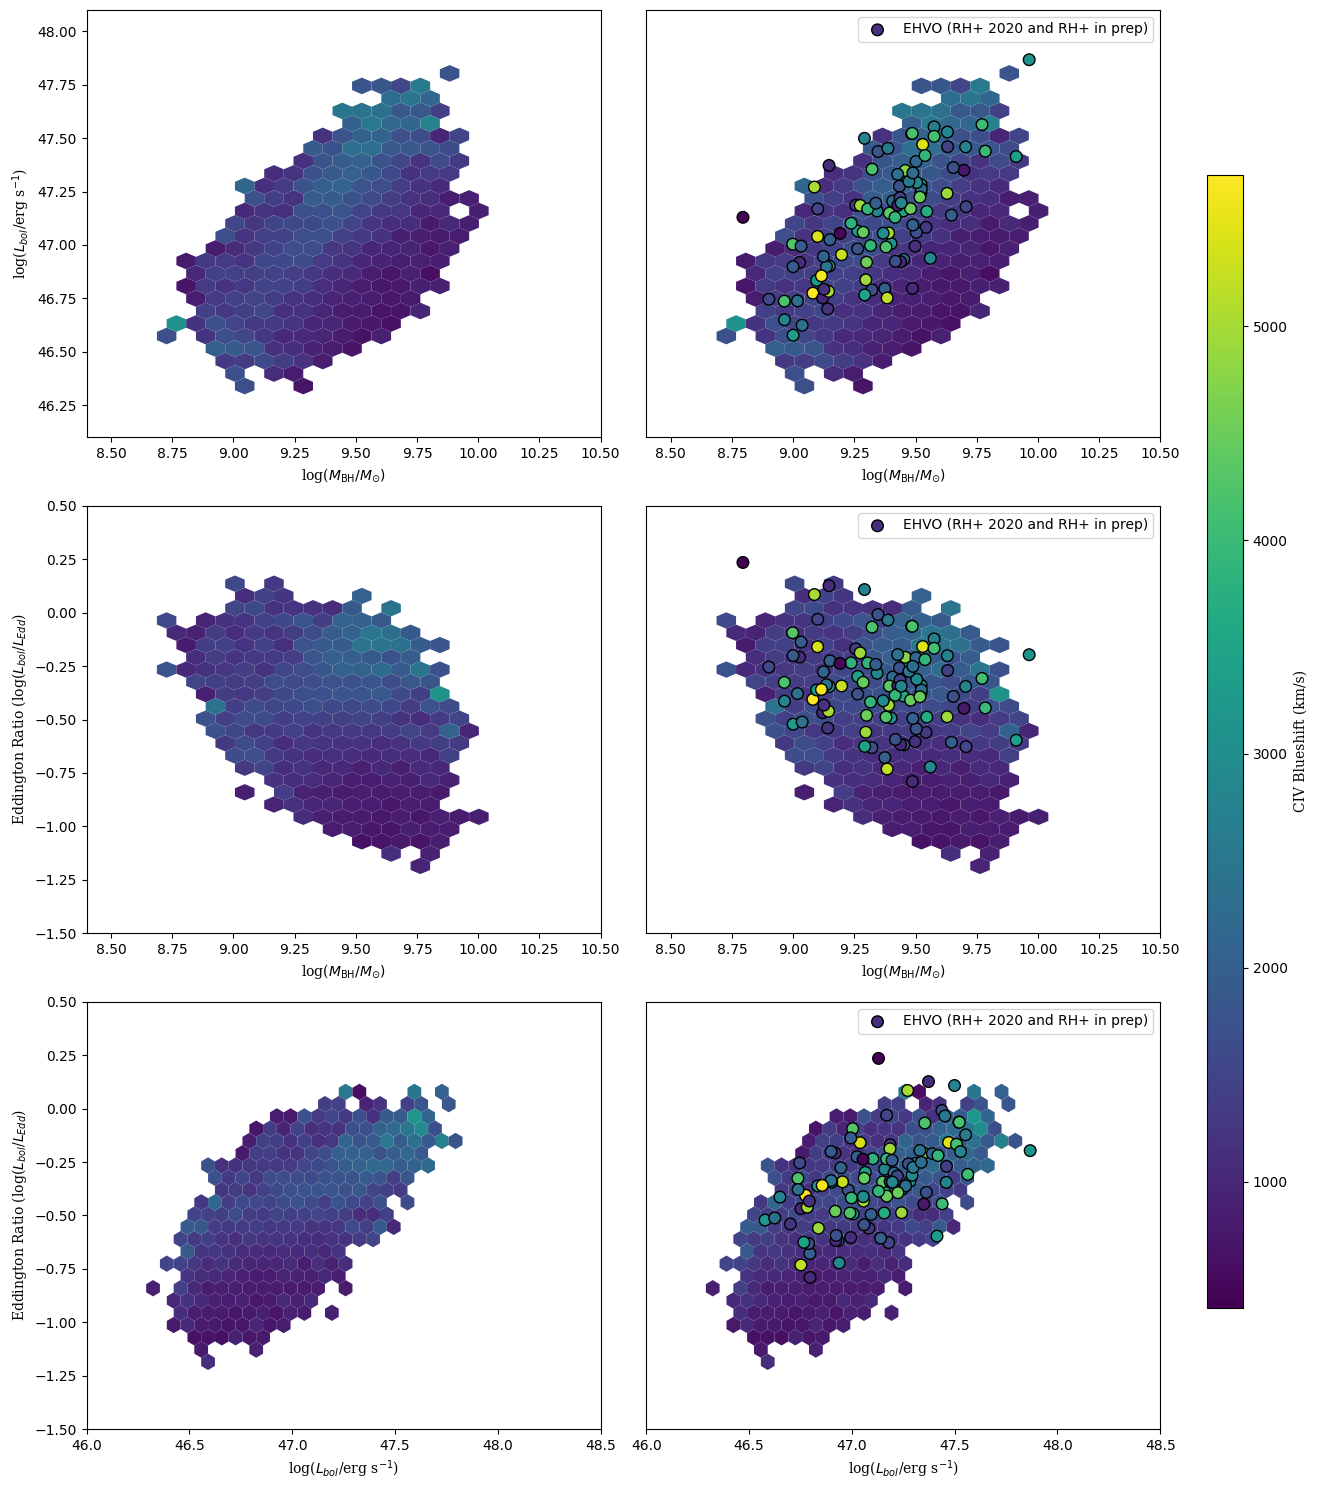

In [25]:
#Altogether Now

fig, axes = plt.subplots(3, 2, figsize=(12, 15))
cm = axes[0,0].hexbin(parentboth_mbh[bb_both], parentboth_lbol[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
axes[0,0].set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
axes[0,0].set_ylabel('log($L_{bol}$/erg s$^{-1}$)',fontname='serif')
axes[0,0].set_xlim(8.4,10.5)
axes[0,0].set_ylim(46.1,48.1)


#Parent Sample and EHVO sample, DR9 and DR16 combined

cm = axes[0,1].hexbin(parentboth_mbh[bb_both], parentboth_lbol[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
sc = axes[0,1].scatter(EHVOboth_mbh, EHVOboth_lbol, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 70, vmin=cbar.vmin, vmax=cbar.vmax, label = 'EHVO (RH+ 2020 and RH+ in prep)')
axes[0,1].set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
#Removing yticks for second plot
axes[0,1].set_yticks([])
axes[0,1].set_xlim(8.4,10.5)
axes[0,1].set_ylim(46.1,48.1)
axes[0,1].legend(loc='upper right')

##EDD RATIO VS MBH, C IV emission line Blueshift####################################################

#Parent Sample only, DR9 and DR16 combined

cm = axes[1,0].hexbin(parentboth_mbh[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
axes[1,0].set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
axes[1,0].set_ylabel('Eddington Ratio (log($L_{bol}$/$L_{Edd}$)',fontname='serif')
axes[1,0].set_xlim(8.4,10.5)
axes[1,0].set_ylim(-1.5,0.5)



#Parent Sample and EHVO sample, DR9 and DR16 combined
cm = axes[1,1].hexbin(parentboth_mbh[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
sc = axes[1,1].scatter(EHVOboth_mbh, EHVOboth_redd, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 70, vmin=cbar.vmin, vmax=cbar.vmax, label = 'EHVO (RH+ 2020 and RH+ in prep)')
axes[1,1].set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
#Removing yticks for second plot
axes[1,1].set_yticks([])
axes[1,1].set_xlim(8.4,10.5)
axes[1,1].set_ylim(-1.5,0.5)
axes[1,1].legend(loc='upper right')


##EDD RATIO VS LBOL, C IV emission line Blueshift####################################################

#Parent Sample only, DR9 and DR16 combined

cm = axes[2,0].hexbin(parentboth_lbol[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
axes[2,0].set_xlabel('log($L_{bol}$/erg s$^{-1}$)', fontname='serif')
axes[2,0].set_ylabel('Eddington Ratio (log($L_{bol}$/$L_{Edd}$)',fontname='serif')
axes[2,0].set_xlim(46,48.5)
axes[2,0].set_ylim(-1.5,0.5)



#Parent Sample and EHVO sample, DR9 and DR16 combined
cm = axes[2,1].hexbin(parentboth_lbol[bb_both], parentboth_redd[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(EHVOboth_CivBlue), vmax=max(EHVOboth_CivBlue), edgecolor = 'None', zorder= 99)
sc = axes[2,1].scatter(EHVOboth_lbol, EHVOboth_redd, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 70, vmin=cbar.vmin, vmax=cbar.vmax, label = 'EHVO (RH+ 2020 and RH+ in prep)')
axes[2,1].set_xlabel('log($L_{bol}$/erg s$^{-1}$)', fontname='serif')
#Removing yticks for second plot
axes[2,1].set_yticks([])
axes[2,1].set_xlim(46,48.5)
axes[2,1].set_ylim(-1.5,0.5)
axes[2,1].legend(loc='upper right')

cbarax = fig.add_axes([1.01, 0.125, 0.03, 0.755])
cbar = plt.colorbar(cm, cax=cbarax)
cbarax.set_ylabel('CIV Blueshift (km/s)', rotation=90, fontname='serif')

plt.tight_layout()
plt.show()

<ipython-input-28-df434847142f>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


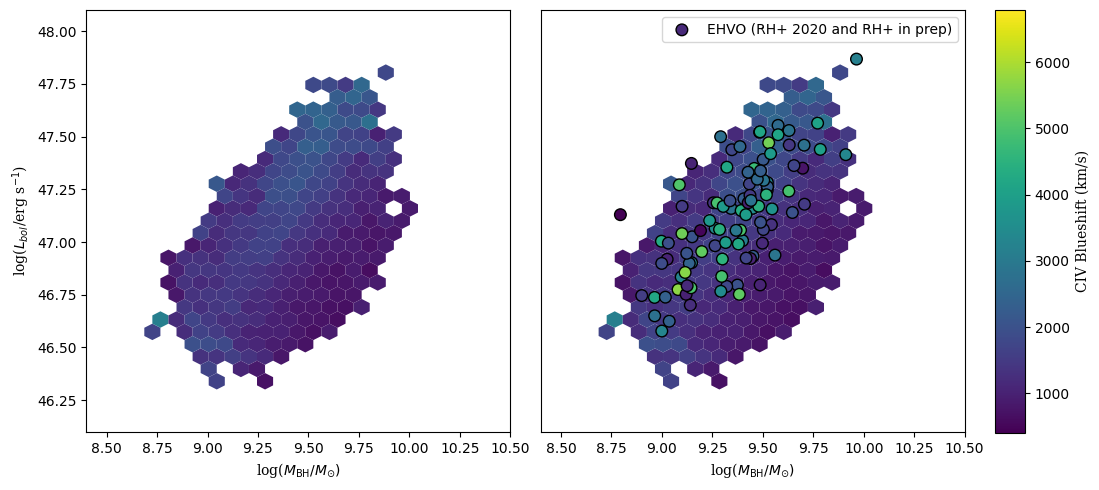

In [ ]:
#Corner Plots attempt
##LBOL vs MBH, C IV emission line Blueshift
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

#Parent Sample only, DR9 and DR16 combined
cm = ax1.hexbin(parentboth_mbh[bb_both], parentboth_lbol[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), edgecolor = 'None', zorder= 99)
ax1.set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
ax1.set_ylabel('log($L_{bol}$/erg s$^{-1}$)',fontname='serif')
ax1.set_xlim(8.4,10.5)
ax1.set_ylim(46.1,48.1)
#Parent Sample and EHVO sample, DR9 and DR16 combined
cm = ax2.hexbin(parentboth_mbh[bb_both], parentboth_lbol[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), edgecolor = 'None', zorder= 99)
sc = ax2.scatter(EHVOboth_mbh, EHVOboth_lbol, c = EHVOboth_CivBlue, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 70, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), label = 'EHVO (RH+ 2020 and RH+ in prep)')
ax2.set_xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
#Removing yticks for second plot
ax2.set_yticks([])
ax2.set_xlim(8.4,10.5)
ax2.set_ylim(46.1,48.1)
ax2.legend(loc='upper right')
#Creating the colorbar and settings it label and location
cbarax = fig.add_axes([1, 0.125, 0.03, 0.845])
cbar = plt.colorbar(cm, cax=cbarax)
cbarax.set_ylabel('CIV Blueshift (km/s)', rotation = 90, fontname='serif')


plt.tight_layout()
plt.show()

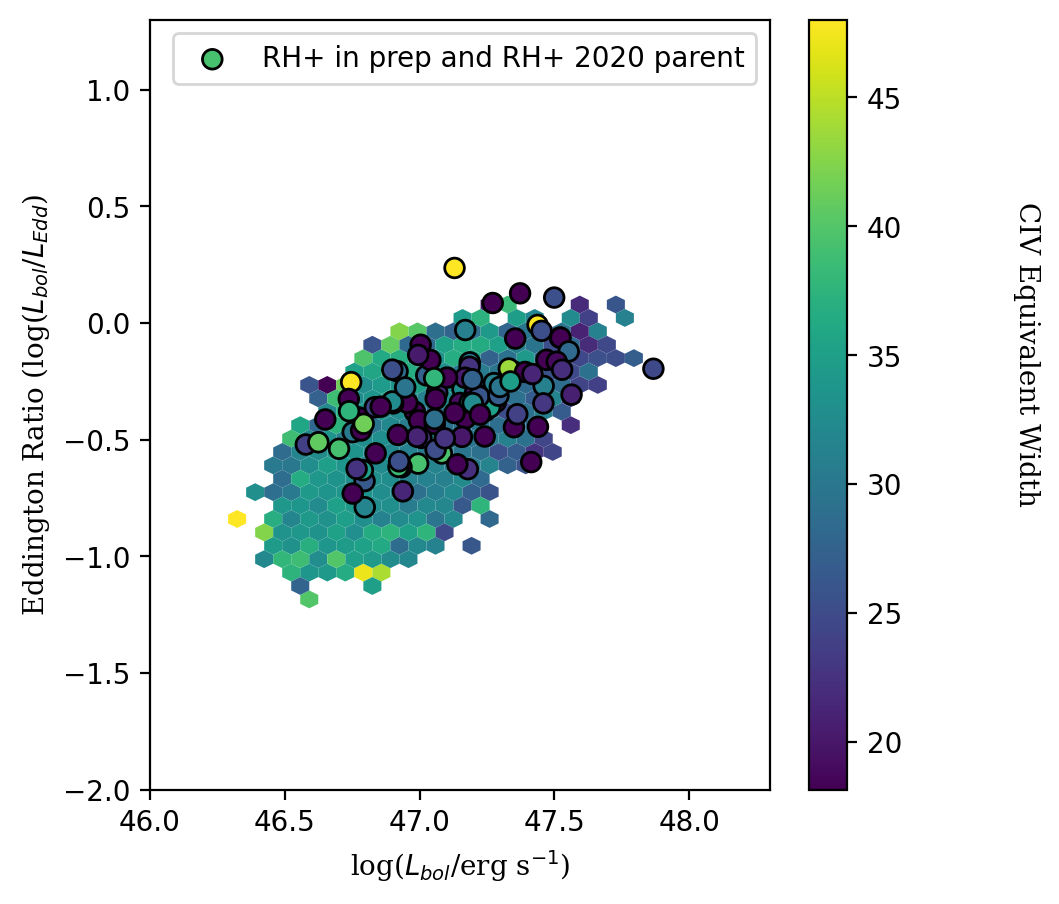

In [ ]:
##Hexagon Plots - EDDINGTON RATIO VS LBOL C IV EW
#NEED TO ASK PAOLA ABOUT BB VALUES AND IF I SHOULD BE USING THEM HERE!!
plotDR9 = 'yes'
plotDR16 = 'yes'

figure(figsize=(5, 5), dpi=200)
#plt.axis((-700,6200,0.8,2.0))

#JUST DR9

if plotDR9 == 'yes' and plotDR16 == 'no':
  cm = plt.hexbin(Parentin9Rank_lbol[bb9], Parentin9Rank_redd[bb9],  C = Parentin9Rank_CivEW[bb9], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_DR9_CivEW), vmax=max(c_DR9_CivEW), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOin9Rank_lbol, EHVOin9Rank_redd, c = EHVOin9Rank_CivEW, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_DR9_CivEW), vmax=max(c_DR9_CivEW), label = 'RH+ 2020 EHVO')

#JUST DR16

if plotDR9 == 'no' and plotDR16 == 'yes':
  cm = plt.hexbin(Parentin16Rank_lbol[bb16], Parentin16Rank_redd[bb16],  C = Parentin16Rank_CivBlue[bb16], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_DR16_CivBlue), vmax=max(c_DR16_CivBlue), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOin16Rank_lbol, EHVOin16Rank_redd, c = EHVOin16Rank_CivEW, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(c_DR16_CivEW), vmax=max(c_DR16_CivEW), label = 'RH+ in prep EHVO')


#DR9 AND DR16

if plotDR16 == 'yes' and plotDR9 == 'yes':
  cm = plt.hexbin(parentboth_lbol[bb_both], parentboth_redd[bb_both],  C = parentboth_CivEW[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=None, vmax=None, edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(EHVOboth_lbol, EHVOboth_redd, c = EHVOboth_CivEW, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=cbar.vmin, vmax=cbar.vmax, label = 'RH+ in prep and RH+ 2020 parent')


plt.axis((46.0,48.3,-2,1.3))
plt.xlabel('log($L_{bol}$/erg s$^{-1}$)', fontname='serif')
plt.ylabel('Eddington Ratio (log($L_{bol}$/$L_{Edd}$)',fontname='serif')
plt.text(49.2,-0.76,'CIV Equivalent Width', rotation = -90, fontname='serif')
plt.legend(loc='upper right')
plt.show()

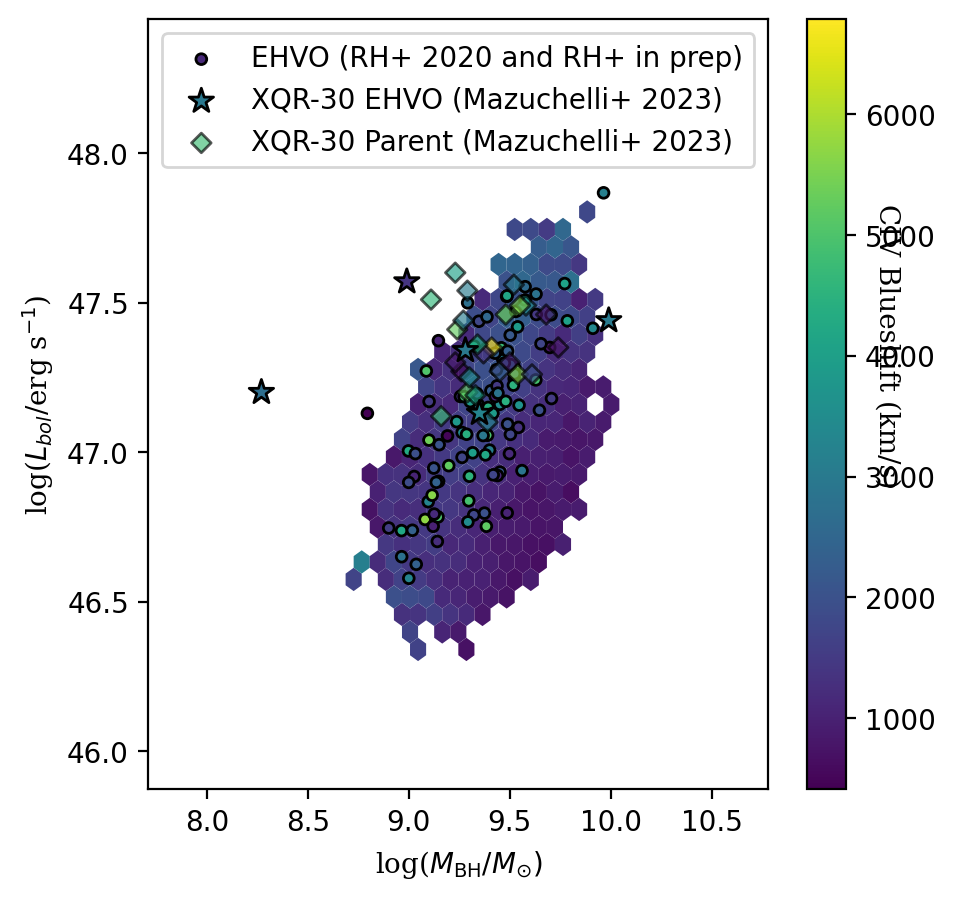

In [75]:
### XQR-30 HEXAGON PLOTS ###

DR9DR16 = 'yes'
#DR9DR16 = 'no'

figure(figsize=(5, 5), dpi=200)
#plt.axis((-700,6200,0.8,2.0))
if DR9DR16 == 'yes':
    cm = plt.hexbin(parentboth_mbh[bb_both], parentboth_lbol[bb_both],  C = parentboth_CivBlue[bb_both], gridsize = 35, cmap = 'viridis', reduce_C_function = np.median, mincnt = 4, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), edgecolor = 'None', zorder= 97)
    cbar = plt.colorbar(cm)
    sc = plt.scatter(EHVOboth_mbh, EHVOboth_lbol, c = EHVOboth_CivBlue, zorder = 98, cmap = 'viridis', edgecolor = 'k', s = 15, vmin=min(c_both_CivBlue), vmax = max(c_both_CivBlue), label = 'EHVO (RH+ 2020 and RH+ in prep)')
    sc = plt.scatter(xqr_mbh_EHVO, xqr_lbol_EHVO, marker = '*', c = xqr_bs_EHVO, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 85, vmin=min(c_both_CivBlue), vmax = max(c_both_CivBlue), label = 'XQR-30 EHVO (Mazuchelli+ 2023)')
    sc = plt.scatter(xqr_mbh_Parent, xqr_lbol_Parent, alpha=0.65, marker = 'D', c = xqr_bs_Parent, zorder = 99, cmap = 'viridis', edgecolor = 'k', s = 25, vmin=min(xqr_bs_both), vmax = max(xqr_bs_both), label = 'XQR-30 Parent (Mazuchelli+ 2023)')
if DR9DR16 == 'no':
  cm = plt.hexbin(xqr_mbh_Parent, xqr_lbol_Parent,  C = xqr_bs_Parent , gridsize = 7, cmap = 'viridis', reduce_C_function = np.median, mincnt = 0.5, vmin=min(xqr_bs_EHVO), vmax=max(xqr_bs_EHVO), edgecolor = 'None', zorder= 99)
  cbar = plt.colorbar(cm)
  sc = plt.scatter(xqr_mbh_EHVO, xqr_lbol_EHVO, c = xqr_bs_EHVO, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 50, vmin=min(xqr_bs_EHVO), vmax = max(xqr_bs_EHVO), label = 'XQR-30 EHVO (Mazuchelli+ 2023)')
  plt.xlim(8,10.5)
  plt.ylim(46.5,48.1)




#plt.axis((8,10.5,47,47.7))
plt.xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
plt.ylabel('log($L_{bol}$/erg s$^{-1}$)',fontname='serif')
plt.text(11.3,46.9,'CIV Blueshift (km/s)', rotation = -90, fontname='serif')
#plt.text(11.,46.85,'CIV Blueshift (km/s)', rotation = -90, fontname='serif')
plt.legend(loc='upper right')
plt.show()




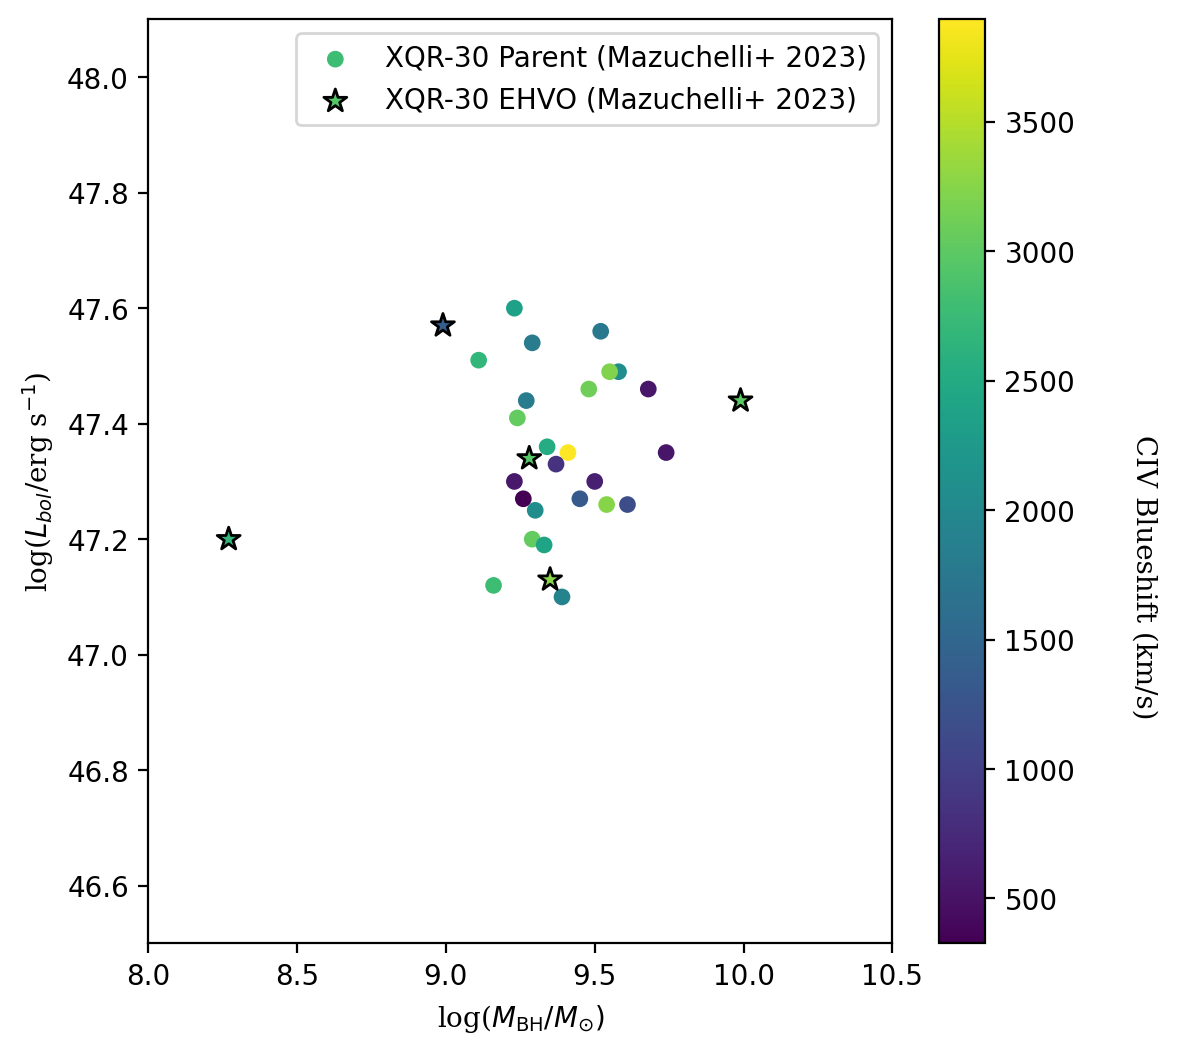

1985.0
2656.8
2063.0
2956.0


In [66]:
# Lbol vs MBH cm = CIV blueshift



figure(figsize=(6, 6), dpi=200)
#DR9 AND DR16

#DR16 and DR9 Parent
#sc = plt.scatter(parentboth_mbh[bb_both], parentboth_lbol[bb_both] , c = parentboth_CivBlue[bb_both], vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), s=5, cmap='viridis', label = ' RH+ 2020 and RH+ in prep parent')
#DR16 and DR9 EHVO
#sc = plt.scatter(EHVOboth_mbh, EHVOboth_lbol, c = EHVOboth_CivBlue, vmin=min(c_both_CivBlue), vmax=max(c_both_CivBlue), s=50, marker=(5, 0), edgecolor = 'black', label = ' RH+ 2020 and RH+ in prep EHVO')

sc = plt.scatter(xqr_mbh_Parent, xqr_lbol_Parent, c = xqr_bs_Parent, zorder = 100, cmap = 'viridis', s = 25, vmin=min(xqr_bs_both), vmax = max(xqr_bs_both), label = 'XQR-30 Parent (Mazuchelli+ 2023)')
sc = plt.scatter(xqr_mbh_EHVO, xqr_lbol_EHVO, marker = '*', c = xqr_bs_EHVO, zorder = 100, cmap = 'viridis', edgecolor = 'k', s = 75, vmin=min(xqr_bs_both), vmax = max(xqr_bs_both), label = 'XQR-30 EHVO (Mazuchelli+ 2023)')
plt.axis((7.5,11.5,46.0,48.7))
plt.xlabel("log($M_{\mathrm{BH}}/M_{\odot})$", fontname='serif')
plt.ylabel('log($L_{bol}$/erg s$^{-1}$)',fontname='serif')
plt.text(11.3,46.9,'CIV Blueshift (km/s)', rotation = -90, fontname='serif')
plt.legend(loc='upper right')
plt.colorbar(sc)
plt.xlim(8,10.5)
plt.ylim(46.5,48.1)
plt.show()

print(np.mean(xqr_bs_Parent))
print(np.mean(xqr_bs_EHVO))

print(np.median(xqr_bs_Parent))
print(np.median(xqr_bs_EHVO))

In [ ]:
#######EXAMPLE CODE from Paola############


###HEXAGONS#####
'''
 CIV blue vs CIV EW cm = Lbol with hexagons; ; Figure 4a in papers
figure(figsize=(6, 6), dpi=200)
plt.axis((-700,6200,0.8,2.0))
cmap = plt.cm.get_cmap(‘viridis’)
if plotDR9 == ‘yes’:
    cm = plt.hexbin(CIV_blue_parent9, np.log10(CIV_EW_parent9),  C = Lbol_parent9,
    gridsize = 50,
    cmap = cmap,
    reduce_C_function = np.median,
    mincnt = 4,
    #vmin=min(Lbol_parent9), vmax=max(Lbol_parent9),
    vmin = None, vmax = None,
    edgecolor =‘None’, zorder = 99)
    cbar = plt.colorbar(cm)
    plt.scatter(CIV_blue_EHVO9 , np.log10(CIV_EW_EHVO9), c = Lbol_EHVO9,
                    zorder=100,
                    cmap=cmap,
                    edgecolor=‘k’,
                    s=60,
                    #vmin = min(Lbol_parent9), vmax=max(Lbol_parent9))
                    vmin=cbar.vmin, vmax=cbar.vmax, label = ‘RH+2020 EHVO’)
#sc = plt.scatter(CIV_blue_parent9 , np.log10(CIV_EW_parent9), c = Lbol_parent9, vmin=min(Lbol_EHVO9), vmax=max(Lbol_EHVO9), s=5, cmap=cm, label = ‘RH+2020 parent’)
#sc = plt.scatter(CIV_blue_EHVO9 , np.log10(CIV_EW_EHVO9), c = Lbol_EHVO9, vmin=min(Lbol_EHVO9), vmax=max(Lbol_EHVO9), s=50, cmap=cm, marker=(5, 0), edgecolor = ‘black’, label = ‘RH+2020 EHVO’)
#plt.colorbar(sc)
if plotDR16 == ‘yes’:
    cm = plt.hexbin(CIV_blue_parent16, np.log10(CIV_EW_parent16),  C = Lbol_parent16,
    gridsize = 50,
    cmap = cmap,
    reduce_C_function = np.median,
    mincnt = 4,
    #vmin=min(Lbol_parent9), vmax=max(Lbol_parent9),
    vmin = None, vmax = None,
    edgecolor =‘None’, zorder = 99)
    cbar = plt.colorbar(cm)
    plt.scatter(CIV_blue_EHVO16 , np.log10(CIV_EW_EHVO16), c = Lbol_EHVO16,
                    zorder=100,
                    cmap=cmap,
                    edgecolor=‘k’,
                    s=60,
                    #vmin = min(Lbol_parent9), vmax=max(Lbol_parent9))
                    vmin=cbar.vmin, vmax=cbar.vmax, label = ‘RH(in prep) EHVO’)
plt.xlabel(‘CIV Blueshift (km/s)’, fontname=‘serif’)
plt.ylabel(r’log CIV EW ($\rm \AA$)’,fontname=‘serif’)
plt.text(8000,1.25,‘log($L_{bol}$/erg s$^{-1}$)’, rotation = -90)
plt.legend(loc=‘upper right’)
#plt.savefig(‘CIVblue_CIVEW_wLbol_hexagon.png’)
plt.show()
'''
####SCATTERPLOT####
'''
# Lbol vs Eddington ratio cm = CIV blueshift
figure(figsize=(6, 6), dpi=200)
plt.axis((46.0,48.2,-2,1))
if plotDR9 == ‘yes’:
    bb = np.where(CIV_blue_parent9 > 500)
    sc = plt.scatter(Lbol_parent9[bb] , logRedd_parent9[bb], c = CIV_blue_parent9[bb], vmin=min(CIV_blue_parent9[bb]), vmax=max(CIV_blue_parent9[bb]), s=5, cmap=cm, label = ‘RH+2020 parent’)
    sc = plt.scatter(Lbol_EHVO9 ,logRedd_EHVO9, c = CIV_blue_EHVO9, vmin=min(CIV_blue_parent9[bb]), vmax=max(CIV_blue_parent9[bb]), s=50, cmap=cm, marker=(5, 0), edgecolor = ‘black’, label = ‘RH+2020 EHVO’)
#sc = plt.scatter(Lbol_parent9[bb] , logRedd_parent9[bb], c = CIV_blue_parent9[bb], vmin=min(CIV_blue_EHVO9), vmax=max(CIV_blue_EHVO9), s=5, cmap=cm, label = ‘RH+2020 parent’)
#sc = plt.scatter(Lbol_EHVO9 ,logRedd_EHVO9, c = CIV_blue_EHVO9, vmin=min(CIV_blue_EHVO9), vmax=max(CIV_blue_EHVO9), s=50, cmap=cm, marker=(5, 0), edgecolor = ‘black’, label = ‘RH+2020 EHVO’)
if plotDR16 == ‘yes’:
    bb = np.where(CIV_blue_parent16 > 500)
    sc = plt.scatter(Lbol_parent16[bb] , logRedd_parent16[bb], c = CIV_blue_parent16[bb], vmin=min(CIV_blue_parent16[bb]), vmax=max(CIV_blue_parent16[bb]), s=5, cmap=cm, label = ‘RH(in prep) parent’)
    sc = plt.scatter(Lbol_EHVO16 ,logRedd_EHVO16, c = CIV_blue_EHVO16, vmin=min(CIV_blue_parent16[bb]), vmax=max(CIV_blue_parent16[bb]), s=50, cmap=cm, marker=(5, 0), edgecolor = ‘black’, label = ‘RH(in prep) EHVO’)
plt.xlabel(‘log($L_{bol}$/erg s$^{-1}$)’, fontname=‘serif’)
plt.ylabel(‘Eddington Ratio (log($L_{bol}$/$L_{Edd}$)’,fontname=‘serif’)
plt.text(48.8,-1.0,‘CIV Blueshift (km/s)’, rotation = -90)
plt.legend(loc=‘upper right’)
plt.colorbar(sc)
plt.savefig(‘Lbol_Eddingtonratio_wCIVblue_minmaxparent_Rankinevalues_gt500.png’)
plt.show()

'''




